## HERE WE ARE ONLY ANALYZING DATA FROM AFRICA ##

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('./DataSets/linkedin-jobs-africa.csv')
df.head(2)



In [ ]:
df.shape


In [ ]:
# localizacion = df['location']
# len(localizacion)

df.isna().sum()


In [ ]:
print(df["onsite_remote"].unique())

# Obtenemos la cantidad de puestos trabajo enfocados en las 3 categorias Onsite|Remote|Hybrid

In [ ]:
c = sns.countplot(y='onsite_remote', data=df)
c.set_xlabel('cantidad de ofertas de trabajo') # Capturamos el grafico para renombrarlo
c.set_ylabel('Tipo de Trabajo')
plt.show()

In [ ]:
# Conteo de tipos de trabajo
counts = df["onsite_remote"].value_counts()
counts

# Empresas que ofrecen mayores puestos de trabajo #

In [ ]:
top_10 = df['company'].value_counts().head(10)
top_10_df = pd.DataFrame({'company': top_10.index, 'count': top_10.values})
c = sns.barplot(y='company', x='count', data=top_10_df)
c.set_xlabel('cantidad de ofertas de trabajo') # Capturamos el grafico para renombrarlo
c.set_ylabel('Empresas')
plt.show()

In [ ]:
# Selecciona las 10 empresas más frecuentes
top_10 = df['company'].value_counts().head(10)

# Crea un nuevo dataframe solo con las 10 empresas seleccionadas
df_top_10 = df.loc[df['company'].isin(top_10.index)]

# Cuenta el número de ofertas de trabajo online, remota e híbrida para cada empresa
counts = df_top_10.loc[df_top_10['onsite_remote'].isin(['online', 'remote', 'hybrid'])].groupby('company')['onsite_remote'].value_counts()

# Muestra los resultados
print(counts)



# Comparando Tipos de trabajo en Empresas de Africa  #

In [ ]:


# Selecciona las 10 empresas más frecuentes
top_10 = df['company'].value_counts().head(10)

# Crea un nuevo dataframe solo con las 10 empresas seleccionadas
df_top_10 = df.loc[df['company'].isin(top_10.index)]

# Filtra las ofertas de trabajo que se realizan en línea, remotamente o de forma híbrida
df_filtered = df_top_10.loc[df_top_10['onsite_remote'].isin(['onsite', 'remote', 'hybrid'])]

# Cuenta el número de ofertas de trabajo online, remota e híbrida para cada empresa
counts = df_filtered.groupby(['company', 'onsite_remote']).size().reset_index(name='count')

# Crea un gráfico de barras utilizando Seaborn
sns.set_style("whitegrid")
ax = sns.barplot(x='company', y='count', hue='onsite_remote', data=counts, palette=sns.color_palette('bright', n_colors=3))

# Rotar etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Muestra el gráfico
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona las 10 empresas más frecuentes
top_10 = df['company'].value_counts().head(10)

# Crea un nuevo dataframe solo con las 10 empresas seleccionadas
df_top_10 = df.loc[df['company'].isin(top_10.index)]

# Filtra las ofertas de trabajo que se realizan en línea, remotamente o de forma híbrida
df_filtered = df_top_10.loc[df_top_10['onsite_remote'].isin(['onsite', 'remote', 'hybrid'])]

# Cuenta el número de ofertas de trabajo online, remota e híbrida para cada empresa
counts = df_filtered.groupby(['company', 'onsite_remote']).size().reset_index(name='count')

# Crea un gráfico de barras agrupadas utilizando Seaborn
sns.set_style("whitegrid")
sns.barplot(x='company', y='count', hue='onsite_remote', data=counts, palette=sns.color_palette('bright', n_colors=3), alpha=0.8)

# Agrega título y etiquetas de los ejes
plt.title('Distribución del tipo de empleo ofrecido por las 10 mayores empresas')
plt.xlabel('Empresa')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
# Muestra el gráfico
plt.show()




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona las 10 empresas más frecuentes
top_10 = df['company'].value_counts().head(5)

# Crea un nuevo dataframe solo con las 10 empresas seleccionadas
df_top_10 = df.loc[df['company'].isin(top_10.index)]

# Filtra las ofertas de trabajo que se realizan en línea, remotamente o de forma híbrida
df_filtered = df_top_10.loc[df_top_10['onsite_remote'].isin(['onsite', 'remote', 'hybrid'])]

# Cuenta el número de ofertas de trabajo online, remota e híbrida para cada empresa
counts = df_filtered.groupby(['company', 'onsite_remote']).size().reset_index(name='count')

# Crea un gráfico de barras agrupadas utilizando Seaborn
sns.set_style("whitegrid")
sns.barplot(x='company', y='count', hue='onsite_remote', data=counts, palette=sns.color_palette('bright', n_colors=3), alpha=0.8, width=0.8)

# Agrega título y etiquetas de los ejes
plt.title('Tipo de empleo ofrecido por las 5 mayores empresas de Africa')
plt.xlabel('Empresa')
plt.ylabel('Cantidad')

# Coloca los nombres de las empresas en el eje x en vertical
plt.xticks(rotation=90)

# Muestra el gráfico
plt.show()


# Comparando empresas de Africa con las fechas # 

In [ ]:
df['posted_date'].unique()

In [ ]:
df['posted_date'] = pd.to_datetime(df['posted_date'])
df.groupby(df['posted_date'].dt.month).count()


In [ ]:

import matplotlib.pyplot as plt

df['posted_date'] = pd.to_datetime(df['posted_date'])
df['posted_date'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Meses del 2022')
plt.ylabel('Cantidad de puestos')
plt.title('Puestos por cada mes')
plt.show()



# Haciendo un analisis y ETL para Paises

In [ ]:
# Extraemos de la columna location en otra columna llamada 'country' los paises que estan escritos 
# luego de la coma para una dividion n=1
df['country'] = df['location'].str.rsplit(',', n=1, expand=True)[1].str.strip()
# Si no encuentra comas agrega todo el valor a la nueva columna country
df.loc[df['country'].isna(), 'country'] = df['location'].str.strip()
df.tail(50)


In [ ]:
# Aqui observamos la cantidad de valores que existe en la columna country
unique_countries = df['country'].unique().tolist()
unique_countries # Observamos que hay 2 que no son un pais estrictamente 'Johannesburg Metropolitan Area' y 'Eastern Africa'

In [ ]:
# Reemplazamos el valor Johannesburg Metropolitan Area con el de su pais
# Respecto a Eastern Africa, lo analizaremos de esta manera
df['country'] = df['country'].replace('Johannesburg Metropolitan Area', 'South Africa')


In [ ]:
# Volvemos a contar los valores que ahora existen en 'country'
unique_countries = df['country'].unique().tolist()
unique_countries

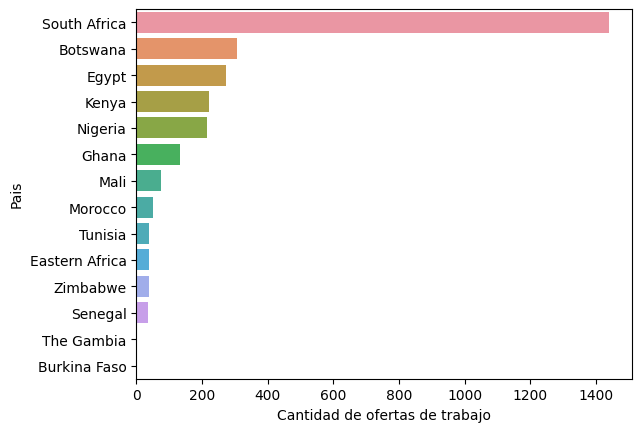

In [10]:
# Con esta informacion tenemos info sobre cuantos puestos de trabajo se han lanzado por pais

country_counts = df['country'].value_counts().sort_values(ascending=False)

# Crear el gráfico utilizando los valores ordenados
c = sns.countplot(y='country', data=df, order=country_counts.index)

c.set_xlabel('Cantidad de ofertas de trabajo')
c.set_ylabel('Pais')
plt.show()


# Haciendo un ETL a la columna de criterio

In [ ]:
df.tail(4)

In [ ]:
unique_countries = df['criteria'].unique().tolist()
len(unique_countries)

In [ ]:
import langid
from googletrans import Translator

translator = Translator()

def translate_if_arabic(text):
    try:

        lang, _ = langid.classify(text)
        if lang == 'ar':
            return translator.translate(text, dest='en').text
        else:
            return text
    except: 
        print(text)
# Aplicamos la función a la columna 'nombre_columna'

df['criteria_english'] = df['criteria'].apply(translate_if_arabic)


In [ ]:
import langdetect

# Supongamos que tienes una columna llamada 'texto'
idiomas_detectados = df['criteria'].apply(lambda x: langdetect.detect_langs(x)[0].lang).unique()

print(idiomas_detectados)


In [ ]:
# Aqui veremos la columna de criteria

import ast
ast.literal_eval(df['criteria'][0])